In [96]:
from pymongo import MongoClient
import json
import time
import matplotlib.pyplot as plt

# need to delete before merging
MONGO_CONNECTION_STRING = ""

In [97]:
mongo_client = MongoClient(MONGO_CONNECTION_STRING)

db = mongo_client['contoso_bookings_comparison']
collection = db["listings"]

test_query = "quiet home with hot tub"
test_query_vector = [0.005093489773571491, 0.015643548220396042, 0.0013122737873345613, -0.011335003189742565, -0.009765115566551685, 0.025408664718270302, -0.00856868177652359, -0.02232421562075615, -0.020180316641926765, -0.014633841812610626, 0.003023935481905937, -0.002901179948821664, -0.006241513416171074, -0.009944926016032696, -0.00011108510807389393, 0.007164773065596819, 0.015187106095254421, -0.007552057970315218, 0.034385379403829575, -0.017635300755500793, -0.030346548184752464, 0.028659092262387276, 0.006497398018836975, -0.008056911639869213, -0.0088453134521842, 0.004688915330916643, 0.019627051427960396, -0.011611634865403175, -0.018105575814843178, 0.007054120302200317, 0.010899307206273079, 0.017994921654462814, -0.019668547436594963, -0.023541398346424103, -0.0328085757791996, -0.03792627155780792, 0.01475832611322403, 0.0028925351798534393, 0.029046377167105675, -0.02896338887512684, 0.020318632945418358, -0.028991051018238068, -0.02841012366116047, 0.016155319288372993, -0.01392151415348053, 0.03231063857674599, 0.012683585286140442, -0.002294318052008748, -0.013140028342604637, 0.012586764059960842, 0.002830292796716094, -0.015325422398746014, 0.0015560559695586562, -0.019682379439473152, 0.006030581425875425, 0.007545142434537411, -0.002437820890918374, 0.0017808196134865284, 0.027331257238984108, -0.01235162653028965, -0.019862189888954163, 0.0036377129144966602, -0.02580978162586689, 0.034025754779577255, -0.005339000839740038, -0.011016876436769962, 0.01235162653028965, 0.001123818219639361, 0.021674130111932755, -0.019239766523241997, 0.02860376611351967, 0.02874208241701126, 0.0003563800419215113, -0.03261493146419525, 0.01987602189183235, -0.01105837058275938, -0.01951639913022518, 0.0160170029848814, 0.02726210094988346, 0.012337794527411461, 0.019862189888954163, -0.019405746832489967, -0.0272759310901165, 0.037511322647333145, 0.018880145624279976, 0.018700335174798965, -0.0003814498195424676, 0.020719749853014946, 0.001587177044712007, -0.032144658267498016, -0.0048479787074029446, 0.015975506976246834, -0.012074993923306465, 0.0052006845362484455, -0.013368249870836735, 0.009654462337493896, -0.00562600651755929, 0.016639424487948418, -0.002408428816124797, 0.0008480504620820284, -0.018907807767391205, -0.008976713754236698, -0.009730536490678787, -0.013416660018265247, -0.05286440625786781, -0.014032166451215744, 0.017234183847904205, -0.020788908004760742, 0.0169852152466774, -0.001491220318712294, -0.009778947569429874, 0.033638469874858856, 0.0036930395290255547, -0.053390007466077805, -0.011390329338610172, -0.0004041423089802265, -0.014578515663743019, -0.0033420624677091837, -0.01901846192777157, -0.00503124762326479, 0.021120866760611534, 0.015698876231908798, 0.005702080670744181, -0.03781561553478241, 0.004363872576504946, -0.004388077650219202, -0.005460027605295181, -0.006099739111959934, -0.008561765775084496, 0.0081053227186203, -0.020138822495937347, -0.006134318187832832, 0.017579974606633186, 0.005415074527263641, -0.018368376418948174, -0.00013615489297080785, -0.021286845207214355, 0.026266224682331085, -0.023306259885430336, -0.025740623474121094, 0.007102530915290117, 0.030844487249851227, -0.01991751603782177, 0.0055499328300356865, 0.03446836769580841, 0.010422117076814175, 0.00793242733925581, 0.0035720127634704113, -0.006438613869249821, -0.01773212105035782, 0.014910473488271236, -0.005933760199695826, -0.0035685549955815077, 0.017483152449131012, 0.012102656997740269, 0.03137008845806122, -0.014205061830580235, 0.014827484264969826, -0.019087620079517365, 0.0066530038602650166, 0.0023565602023154497, 0.01392842922359705, 0.009723620489239693, 0.018326880410313606, 0.02800900675356388, 0.01123126596212387, 0.020180316641926765, -0.004505646415054798, -0.0022995048202574253, 0.009509230963885784, 0.01188826747238636, 0.02818881720304489, -0.007801027037203312, 0.028119659051299095, 0.00405266135931015, 0.01766296476125717, -0.003776028985157609, 0.014882810413837433, -0.014702999964356422, -0.03610049933195114, -0.025159696117043495, -0.00525601115077734, 0.015436074696481228, 0.04149482399225235, -0.03748365864157677, -0.01254526898264885, -0.0014488609740510583, 0.000992417917586863, 0.004159856121987104, -0.010090158320963383, -0.008589428849518299, 0.00557759590446949, -0.007047204300761223, -0.006165439262986183, -0.6378031373023987, -0.005356290377676487, 0.018368376418948174, -0.02026330679655075, 0.015408411622047424, 0.021120866760611534, 0.0008251419058069587, 0.02083040215075016, -0.02455110475420952, 0.00424630381166935, -0.005563764367252588, 0.009004376828670502, 0.016169149428606033, -0.007552057970315218, -0.001658064080402255, -0.0033195859286934137, 0.0024533814284950495, -0.009979505091905594, -0.006130860187113285, -0.004509104415774345, -0.011390329338610172, 0.003917803056538105, -0.011646213941276073, -0.004903305321931839, 0.009149609133601189, 0.018396038562059402, 0.007137109991163015, -0.014163566753268242, -0.015726538375020027, 0.013209185563027859, -0.013347501866519451, 0.005753949284553528, 0.0023634759709239006, 0.008527186699211597, 0.05092798173427582, 0.009799694642424583, -0.006213849876075983, 0.0247032530605793, 0.02098255045711994, 0.03563022240996361, -0.01096154935657978, -0.02120385505259037, 0.0339704304933548, 0.0011514814104884863, 0.009419325739145279, 0.007330752443522215, 0.022739164531230927, -0.027912186458706856, -0.02119002491235733, -0.007233931217342615, 0.04320994392037392, -0.004536767490208149, 0.008160648867487907, 0.02452344074845314, -0.0059994603507220745, -0.015643548220396042, 0.040692590177059174, -0.013866187073290348, 0.005421990528702736, 0.018672671169042587, 0.0014341649366542697, 0.03610049933195114, -0.017815111204981804, -0.030706170946359634, -0.03040187433362007, 0.013478902168571949, -0.008160648867487907, -0.015698876231908798, -0.0025225395802408457, 0.006767114624381065, -0.005425448529422283, 0.03687506914138794, -0.032697923481464386, -0.011722288094460964, 0.013416660018265247, 0.020539937540888786, 0.03078916110098362, -0.006663377396762371, -0.012704332359135151, 0.03325118497014046, 0.006794777698814869, -0.01935042068362236, -0.010843981057405472, -0.015615886077284813, 0.025353338569402695, -0.006666835397481918, -0.02157730981707573, 0.006130860187113285, 0.023513734340667725, -0.009896515868604183, 0.0164042878895998, 0.013997587375342846, -0.005681333132088184, -0.017441658303141594, -0.007144025526940823, 0.00400425074622035, -0.015920180827379227, 0.0482446514070034, 0.014440199360251427, -0.053555987775325775, -0.007994669489562511, -0.025588475167751312, -0.0017203063471242785, 0.0003583251091185957, 0.007009167689830065, 0.009163440205156803, -0.01392151415348053, -0.024800073355436325, 0.023914851248264313, -0.01144565548747778, -0.04356956481933594, -0.015947844833135605, -0.013741702772676945, -0.009225682355463505, 0.0042601353488862514, -0.020941054448485374, 0.02471708506345749, 0.006929636001586914, 0.04334826022386551, -0.013776281848549843, 0.006341792643070221, -0.023914851248264313, 0.0008005043491721153, -0.007033372763544321, 0.029599642381072044, 0.02063675969839096, 0.013340585865080357, -0.012393120676279068, -0.01529775932431221, -0.0021024043671786785, 0.005684791132807732, 0.005470401141792536, 0.011238181963562965, 0.0038209818303585052, -0.004713120404630899, 0.00016014408902265131, 0.022587016224861145, -0.027594057843089104, 0.026155570521950722, -0.018326880410313606, -0.03322352468967438, -0.005249095149338245, -0.0047096628695726395, -0.00866550300270319, -0.008727745153009892, -0.021867772564291954, -0.003969671670347452, -0.0030464117880910635, -0.03153606876730919, -0.006798235699534416, -0.018686503171920776, -0.029903937131166458, -0.024108493700623512, 0.013679460622370243, 0.008651670999825, 0.014135903678834438, 0.014218893833458424, -0.014156650751829147, -0.001950256759300828, 0.0022372626699507236, 0.04569963365793228, 0.007759532425552607, 0.005332084838300943, -0.01605849713087082, -0.02344457618892193, -0.01013856939971447, -0.009329419583082199, 0.015463737770915031, -0.0038313555996865034, -0.02860376611351967, -0.021328339353203773, -0.02271150052547455, -0.013520397245883942, 0.004820315632969141, -0.003212390933185816, -0.011666961945593357, -0.011224349960684776, -0.02398400940001011, -0.012649006210267544, -0.002501792274415493, 0.0015906349290162325, 0.013624134473502636, -0.01919827237725258, 0.007137109991163015, 0.011487150564789772, -0.00013918055628892034, 0.032172322273254395, 0.0009025124600157142, 0.0084926076233387, 0.020705917850136757, 0.017261847853660583, 0.0015785322757437825, 0.0036169656086713076, 0.01216489914804697, -0.006697956472635269, -0.013395912945270538, 0.021535813808441162, -0.004336209036409855, 0.0044434042647480965, 0.018741829320788383, -0.0015015939716249704, 0.001974462065845728, 0.010463612154126167, -0.019447240978479385, 0.011853688396513462, -0.03305754438042641, -0.0048133996315300465, -0.017289509996771812, 0.045229360461235046, 0.0010235389927402139, 0.02177095226943493, -0.026238560676574707, -0.031093455851078033, -0.010297632776200771, -0.0160170029848814, 0.0316467210650444, 0.006082449574023485, 0.03632180392742157, 0.007496731821447611, 0.00302047748118639, 0.024744747206568718, 0.005812733434140682, 0.021162360906600952, 0.015173274092376232, -0.006493940018117428, -0.015339253470301628, 0.010276884771883488, 0.007220099680125713, -0.0003732373006641865, 0.0024654841981828213, -0.005245637614279985, 0.008803818374872208, -0.003869392443448305, 0.022089079022407532, -0.0022752995137125254, 0.009357082657516003, -0.0009284467087127268, -0.02210291102528572, 0.03468967229127884, -0.005190310999751091, 0.03814757615327835, 0.01529775932431221, 0.014730663038790226, -0.03186802566051483, -0.012655921280384064, 0.017068205401301384, 0.00419789319857955, 0.003264259546995163, -0.006244970951229334, -0.0004214318178128451, -0.019073788076639175, 0.008610175922513008, 0.011390329338610172, 0.013119280338287354, 0.025394832715392113, 0.00483760517090559, 0.006611508782953024, -0.013741702772676945, 0.035851530730724335, 0.01809174381196499, -0.0031311302445828915, -0.0003786402812693268, 0.019087620079517365, -0.0032608017791062593, -0.012856479734182358, 0.005394327454268932, 0.013582639396190643, -0.027981344610452652, -0.006936551537364721, 0.0004274831444490701, 0.012102656997740269, -0.011583971790969372, -0.001569887506775558, -0.011646213941276073, -0.010581180453300476, 0.007213183678686619, -0.02896338887512684, -0.008962882682681084, -0.0057159122079610825, 0.02652902528643608, -0.01803641766309738, -0.012033498845994473, 0.03781561553478241, 0.012787321582436562, -0.011549392715096474, 0.007054120302200317, 0.005435822065919638, 0.0027922559529542923, 0.017192689701914787, 0.026695003733038902, -0.005428906064480543, 0.003406033618375659, 0.024108493700623512, -0.005349374376237392, 0.014633841812610626, -0.023541398346424103, 0.019820693880319595, -0.025519317016005516, 0.005415074527263641, 0.0066530038602650166, -0.01752464845776558, -0.01272507943212986, -0.0248968955129385, -0.008146817795932293, 0.0032556147780269384, 0.004173687659204006, 0.000642305298242718, -0.028659092262387276, -0.008056911639869213, -0.011404161341488361, 0.0012042144080623984, 0.0015076453564688563, 0.007026457227766514, -0.019502567127346992, -0.02948898822069168, -0.00338874408043921, -0.015989338979125023, -0.010733327828347683, 0.01918444037437439, -0.015726538375020027, 0.0038140660617500544, -0.015366916544735432, -0.02232421562075615, 0.004474525339901447, 0.11718138307332993, -0.027331257238984108, -0.009647547267377377, 0.035298265516757965, 0.015519064851105213, 3.36605153279379e-05, 0.0028942639473825693, -0.02157730981707573, 0.010352958925068378, 0.012033498845994473, -0.007064493838697672, 0.001230148714967072, 0.002491418505087495, 0.0073584155179560184, 0.003720702603459358, 0.020000506192445755, -0.0013598200166597962, -0.016846898943185806, -0.0036826657596975565, 0.0070886993780732155, -0.02358289249241352, -0.008243639022111893, -0.014813652262091637, 0.012517605908215046, -0.00046162994112819433, 0.019447240978479385, 0.03800925984978676, 0.0037794869858771563, 0.013451239094138145, -0.002200954593718052, -0.009550726041197777, 0.012102656997740269, -0.0010633048368617892, -0.0028337507974356413, -0.0032175779342651367, 0.01208190992474556, -0.0015024584718048573, -0.016376623883843422, 0.012856479734182358, -0.01006249524652958, 0.04044362157583237, 0.01914294622838497, 0.0011480235261842608, -0.01169462502002716, 0.009910346940159798, -0.0027801531832665205, 0.012372373603284359, 0.029820946976542473, -0.03792627155780792, -0.005975254811346531, 0.023652050644159317, 0.003703413065522909, 0.018105575814843178, -0.013672544620931149, 0.010933886282145977, -0.01842370256781578, 0.008188311941921711, -0.01896313577890396, 0.0015551914693787694, -0.02247636392712593, -0.03076149709522724, -0.04680616408586502, -0.0007603061967529356, -0.01033912692219019, -0.02561613917350769, -0.002372120739892125, -0.011217433959245682, 0.019502567127346992, -0.014288051053881645, -0.015602054074406624, -0.01623830758035183, -0.0015534624690189958, -0.031785037368535995, 0.003917803056538105, 0.012137236073613167, -0.00636253971606493, 0.020692085847258568, 0.009149609133601189, 0.006037496961653233, 0.018714165315032005, 0.0083957863971591, -0.021245351061224937, 0.015214769169688225, -0.01338208094239235, -0.009813525713980198, 0.00292365625500679, 0.0280505008995533, 0.01935042068362236, -0.009882683865725994, 0.03385977819561958, 0.027787702158093452, 0.003181269858032465, -0.00034276454243808985, -0.010532769374549389, 0.002989356406033039, 0.006542350631207228, -0.0017073391936719418, -0.0031345882453024387, 0.0030706170946359634, 0.0009604322840459645, 0.008437281474471092, -0.0036342551466077566, 0.008458028547465801, -0.013181522488594055, -0.0024343631230294704, -0.003381828311830759, -0.011196686886250973, 0.010442864149808884, -0.002878703409805894, 0.011383413337171078, 0.008444196544587612, -0.0346066839993, 0.008250554092228413, 0.01227555237710476, -0.02174328826367855, -0.0022545522078871727, -0.008132985793054104, -0.006808609236031771, 0.008292049169540405, -0.022019920870661736, -0.006514687556773424, -0.03662610054016113, 0.006884682923555374, 0.026446035131812096, 0.010103990323841572, -0.007870185188949108, -0.02304345928132534, -0.0079116802662611, 0.002206141594797373, -0.000740423274692148, -0.0011445656418800354, 0.029101703315973282, -0.004408825188875198, -0.0375666469335556, -0.008388870395720005, -0.03662610054016113, 7.82890638220124e-05, 0.008264386095106602, 0.005387411452829838, 0.0019900226034224033, -0.0272759310901165, -0.0017350023845210671, -0.0002900315448641777, -0.016003170982003212, -0.010601927526295185, -0.023140281438827515, -0.020360127091407776, -0.006649545859545469, -0.02302962727844715, 0.04558898136019707, 0.007524394895881414, -0.004339667037129402, -0.02710995264351368, 0.0035408916883170605, 0.013548060320317745, -0.01972387358546257, -0.010996128432452679, -0.015892518684267998, -0.005957965273410082, 0.0002703647187445313, 0.02026330679655075, -0.02063675969839096, 0.016819234937429428, -0.004754615481942892, 0.026044918224215508, 0.013001712039113045, 0.013935345225036144, 0.002111049136146903, -0.014827484264969826, 0.013561892323195934, -0.0015897705452516675, 0.02435746230185032, -0.035657886415719986, -0.010857812128961086, -0.03153606876730919, 0.02289131097495556, -0.00641095032915473, -0.0038209818303585052, 0.00045990096987225115, -0.03006991744041443, -0.002057451754808426, -0.021535813808441162, -0.020747411996126175, -0.0012387933675199747, 0.01114827673882246, -0.0009120216709561646, 0.057816121727228165, 0.0160170029848814, 0.01464767288416624, -0.03137008845806122, 0.03504929691553116, -0.016542604193091393, 0.011701541021466255, 0.018340712413191795, -0.0011290049878880382, -0.012206394225358963, -0.010228474624454975, -0.024675589054822922, 0.00035097706131637096, 0.005370121914893389, 0.008741576224565506, -0.00948156788945198, -0.0017133904621005058, -0.007164773065596819, 0.01712353155016899, 0.01914294622838497, 0.004903305321931839, -0.009198019281029701, -0.019032293930649757, -0.010567348450422287, -0.014993463642895222, -0.02246253192424774, -0.01547756977379322, -0.04589327797293663, -0.009336335584521294, -0.013022459112107754, -0.013250680640339851, 0.01456468366086483, -0.019225936383008957, 0.012662837281823158, -0.012524520978331566, -0.016279803588986397, 0.016003170982003212, -0.018382208421826363, 0.020401623100042343, -0.004924052394926548, -0.002086843829602003, -0.020775076001882553, 0.015090284869074821, -0.0015854481607675552, -0.0037552816793322563, 0.025865107774734497, 0.01338208094239235, 0.0002926249580923468, -0.0015785322757437825, 0.004806484095752239, 0.007199352141469717, -0.009606052190065384, -0.025339506566524506, 0.025892771780490875, 0.033638469874858856, -0.013893851079046726, -0.020166484639048576, 0.00911503005772829, 0.005791985895484686, 0.018492860719561577, 0.023693544790148735, 0.009281009435653687, -0.021300677210092545, -0.0037794869858771563, -0.011175939813256264, -0.006936551537364721, -0.012731995433568954, 0.01080248598009348, 0.009903431870043278, 0.016072329133749008, -0.02156347781419754, -0.0022078705951571465, -0.006933093536645174, 0.013582639396190643, 0.001350310747511685, 0.018755661323666573, -0.030346548184752464, -0.0033904730807989836, 0.010740243829786777, 0.008506438694894314, -0.008796903304755688, 0.0017963801510632038, 0.011839856393635273, 0.029931601136922836, -0.02063675969839096, -0.010733327828347683, 0.005145358387380838, -0.002527726348489523, 0.019322756677865982, 0.003827897598966956, -0.0059199281968176365, 0.0005459163221530616, -0.012012751772999763, -0.006608050782233477, 0.005691706668585539, 0.005183395463973284, -0.01134191919118166, -0.008243639022111893, -0.0020142279099673033, -0.0008493472123518586, -0.005404700990766287, -0.013624134473502636, 0.007586637046188116, -0.005677875131368637, 0.012074993923306465, -0.013160775415599346, -0.03062318079173565, 0.01466150488704443, 0.014454030431807041, -0.019129114225506783, -0.010180063545703888, 0.01033221185207367, -0.04439946264028549, 0.027234436944127083, -0.0018292302265763283, 0.018727997317910194, -0.003834813367575407, -0.007233931217342615, 0.016667088493704796, -0.016265971586108208, -0.0022804865147918463, -0.0065527246333658695, -0.04356956481933594, -0.024938389658927917, 0.003048140788450837, -0.015546727925539017, -0.00474424147978425, -0.018271554261446, 0.011189770884811878, 0.021881604567170143, 0.005913012661039829, -0.012835732661187649, -0.012296299450099468, 0.0265705194324255, -0.015021126717329025, -0.008983629755675793, 0.04558898136019707, 0.02117619290947914, 0.035851530730724335, -0.011355750262737274, 0.013471986167132854, 0.0007953174645081162, -0.00985502079129219, -0.016099991276860237, -0.010629590600728989, 0.008250554092228413, 0.007579721510410309, -0.02024947479367256, -0.01861734502017498, -0.017469322308897972, -0.011943593621253967, 0.03504929691553116, -0.009806610643863678, 0.004308545961976051, 0.01365179754793644, 0.050070423632860184, -0.015408411622047424, 0.01619681343436241, -0.020941054448485374, -0.011957425624132156, -0.009426240809261799, -0.001081458874978125, -0.051342930644750595, -0.011459487490355968, -0.021867772564291954, 0.04055427759885788, 0.01879715546965599, -0.02987627498805523, -0.023679712787270546, 0.011577055789530277, -0.04262901842594147, -0.030208231881260872, -0.006521603558212519, -0.004381162114441395, 0.004408825188875198, -0.0044606938026845455, -0.011030707508325577, 0.016265971586108208, -0.0078079430386424065, 0.044371798634529114, -0.023264765739440918, -0.016003170982003212, 0.0176906269043684, -0.028257975354790688, 0.01716502569615841, 0.0050796582363545895, -0.023693544790148735, -0.007766447961330414, 0.01713736355304718, 0.02820264920592308, -0.007842522114515305, 0.024053167551755905, -0.0027265558019280434, 0.01861734502017498, 0.01625213958323002, -0.009156525135040283, -0.007967006415128708, 0.01197125669568777, 0.010166232474148273, -0.006231139414012432, -0.01586485467851162, -0.008776155300438404, 0.013375164940953255, 0.006376371253281832, -0.003931634593755007, 0.001153210294432938, 0.0022804865147918463, 0.009640631265938282, -0.007164773065596819, -0.02358289249241352, 0.01558822300285101, 0.0023167943581938744, 0.0051799374632537365, -0.005556848831474781, -0.021079370751976967, 0.020000506192445755, -0.01031837984919548, -0.0193642508238554, -0.0012681855587288737, -0.007164773065596819, -0.014827484264969826, -0.003859018674120307, 0.007026457227766514, -0.010733327828347683, 0.010636506602168083, -0.030567854642868042, 0.01860351301729679, -0.015034958720207214, -0.0031466910149902105, -0.005771238822489977, 0.024302136152982712, -0.0032971096225082874, 0.03590685501694679, 0.01474449411034584, -0.02542249672114849, 0.007814859040081501, -0.018727997317910194, -0.016099991276860237, -0.0043258354999125, -0.004080324433743954, -0.006815525237470865, -0.030872149392962456, -0.004436488263309002, 0.0016978299245238304, -0.024398956447839737, -0.04520169645547867, 0.0011030707973986864, 0.006836272310465574, 0.008997460827231407, 0.023486070334911346, 0.21920332312583923, 0.011514813639223576, 0.0064524454064667225, 0.019059956073760986, -0.011065286584198475, 0.019668547436594963, 0.02045694924890995, 0.006272634491324425, -0.022780658677220345, 0.026653509587049484, -0.018174733966588974, -0.0021923098247498274, 0.018658839166164398, 0.004308545961976051, -0.015920180827379227, -0.02416381984949112, -0.007828690111637115, -0.02049844339489937, -0.026224728673696518, -0.0162106454372406, -0.005390869453549385, -0.0016502838116139174, 0.009792778640985489, -0.00011821703083114699, 0.007413742132484913, -0.0031951016280800104, -0.0006474921829067171, -0.018008753657341003, 0.018492860719561577, 0.020360127091407776, -0.009861936792731285, 0.007033372763544321, 0.0026504818815737963, -0.02265617437660694, 0.032199982553720474, -0.005729743745177984, 0.005325169302523136, -0.015353085473179817, 0.026446035131812096, 0.010996128432452679, -0.024938389658927917, -0.016445782035589218, -0.01456468366086483, -0.007199352141469717, -0.014454030431807041, 0.01031837984919548, -0.01253143697977066, 0.006141234189271927, 0.020166484639048576, 0.0032193069346249104, 0.00041991897160187364, 0.0027663216460496187, 0.006964214611798525, 0.015090284869074821, 0.012323963455855846, -0.0040941559709608555, 0.034579019993543625, -0.01049127522855997, -0.02119002491235733, 0.0096821254119277, -0.0028579561039805412, 0.047829702496528625, -0.0019485278753563762, 0.0032486990094184875, -0.011777614243328571, -0.006514687556773424, -0.009142693132162094, 0.009875768795609474, 0.008893724530935287, 0.009336335584521294, 0.021840110421180725, -0.018921639770269394, -0.016874562948942184, -0.014938137494027615, -0.021881604567170143, -0.008693166077136993, 0.04000101238489151, 0.00901820883154869, 0.02172945626080036, 0.03294689208269119, -0.017607636749744415, -0.019848357886075974, -0.016805404797196388, 0.0018828277243301272, 0.00046811348875053227, -0.006487024482339621, 0.028257975354790688, -0.0054669431410729885, -0.03167438134551048, -0.011583971790969372, 0.009370914660394192, -0.005584511905908585, 0.0019710042979568243, 0.012489941902458668, 0.028852734714746475, -0.0024395498912781477, 7.29401217540726e-05, -1.71139145095367e-05, -0.014135903678834438, 0.013292175717651844, 0.003890139749273658, -0.0158233605325222, 0.0003784241562243551, 0.005307879764586687, -0.014523188583552837, 0.02099638059735298, 0.009066618978977203, 0.003086177632212639, -0.006476650480180979, -0.0010512021835893393, 0.0029634220991283655, -0.04002867639064789, -0.010186979547142982, -0.006514687556773424, -0.0017306800000369549, 0.029627304524183273, 0.016072329133749008, -0.04334826022386551, -0.0014479964738711715, -0.005228348076343536, 0.0094884829595685, -0.009246430359780788, 0.0001117334613809362, 0.0067221615463495255, -0.029627304524183273, -0.023555228486657143, -0.01031837984919548, 0.007185520604252815, -0.014412536285817623, -0.03778795525431633, 0.021328339353203773, -0.004066492896527052, 0.0178842693567276, 0.022642342373728752, -0.0060202074237167835, 0.010774822905659676, -0.000716217968147248, -0.014122072607278824, 0.01300862804055214, -0.0003881495213136077, 0.005850770510733128, -0.003074074862524867, -0.0005000990931876004, -0.027331257238984108, 0.016999047249555588, -0.029267683625221252, 0.028285639360547066, -0.03670908883213997, -0.01604466512799263, -0.02504904195666313, 0.0025363711174577475, 0.0013165961718186736, -0.00938474666327238, -0.020152652636170387, 0.005705538671463728, -0.03388744220137596, -0.012704332359135151, -0.02269766852259636, -0.004235930275171995, 0.01730334199965, -0.010041747242212296, 0.00483760517090559, 0.010263053700327873, 0.013817776925861835, -0.029184693470597267, -0.0040077087469398975, -0.1787043809890747, 0.023375418037176132, 0.02525651641190052, -0.0450357161462307, -0.0016857272712513804, 0.0270822886377573, 0.01767679490149021, 0.016819234937429428, 0.008990545757114887, 0.005774696357548237, 0.006611508782953024, 0.007897848263382912, -0.02012499049305916, 0.003921261057257652, 0.011003044433891773, 0.04110753908753395, 0.011507898569107056, 0.02103787660598755, 0.015809528529644012, 0.010477443225681782, 0.024246810004115105, -0.027995174750685692, 0.02030480094254017, 0.010311463847756386, 0.025574643164873123, 0.004495272878557444, -0.003952382132411003, 0.009170356206595898, 0.012773490510880947, 0.011756867170333862, -0.016348961740732193, 0.013368249870836735, 0.016003170982003212, -0.00047719047870486975, 0.0430992916226387, -0.0038140660617500544, 0.024841569364070892, 0.014073661528527737, 0.007337668444961309, 0.010871644131839275, -0.007503647357225418, 0.010304547846317291, 0.02301579713821411, 0.014896642416715622, -0.013354417867958546, 0.017386332154273987, 0.01271816436201334, 0.019239766523241997, 0.0024706709664314985, 0.01766296476125717, 0.03247661516070366, -0.011003044433891773, 0.014689167961478233, 0.002617631806060672, -0.01105145551264286, 0.017815111204981804, -0.029157031327486038, 0.019308924674987793, 0.009101198054850101, -0.012088825926184654, -0.002389410277828574, -0.041743792593479156, -0.005058910697698593, -0.007683458272367716, 0.007669626735150814, -0.04492506384849548, 0.006372913718223572, -0.003620423609390855, -0.005743575282394886, 0.0074759842827916145, -0.007759532425552607, -0.01677774079144001, 0.02394251339137554, 0.011355750262737274, 0.01023539062589407, 0.018188564106822014, -0.01448169443756342, -0.014799821190536022, 0.00975819956511259, 0.001195569639094174, -0.0009699415531940758, 0.026695003733038902, -0.053749628365039825, 0.001123818219639361, -0.013326754793524742, -0.006694498471915722, -0.012337794527411461, -0.013963008299469948, -0.019959010183811188, -0.002985898405313492, 0.0081053227186203, -0.009059703908860683, 0.016362791880965233, -0.023541398346424103, 0.010380621999502182, 0.0346066839993, 0.03350015729665756, 0.0039281765930354595, -0.018174733966588974, 0.00562600651755929, 0.008838397450745106, -0.009032039903104305, -0.008554849773645401, 0.022061415016651154, 0.006566556170582771, 0.00996567402034998, -0.032531943172216415, 0.021798614412546158, 0.01824389211833477, -0.014702999964356422, -0.009633715264499187, 0.007095614913851023, 0.018216228112578392, 0.006355624180287123, -0.014315715059638023, 0.02232421562075615, 0.015090284869074821, -0.014205061830580235, 0.023914851248264313, -0.0037068710662424564, 0.01427421998232603, -0.017925765365362167, -0.0369303934276104, 0.008520270697772503, -0.018285386264324188, 0.010249221697449684, -0.08077659457921982, -0.012310131452977657, 0.01291872188448906, 0.0022441784385591745, -0.03413641080260277, 0.008070743642747402, -0.01604466512799263, 0.025325674563646317, -0.003921261057257652, 0.028105828911066055, 0.01915677823126316, -0.019959010183811188, -0.009751283563673496, 0.01254526898264885, 0.03305754438042641, -0.0038555609062314034, -0.015809528529644012, -0.03231063857674599, 0.008907555602490902, 0.024260642006993294, -0.03167438134551048, -0.01954406313598156, 0.008561765775084496, -0.008174480870366096, 0.010366790927946568, -0.016846898943185806, -0.02841012366116047, 0.019627051427960396, 0.01715119369328022, 0.009377830661833286, 0.009972590021789074, 0.013866187073290348, 0.006628798320889473, -0.0018793698400259018, -0.004301630426198244, 0.017745953053236008, 0.014689167961478233, -0.009834273718297482, 0.034910980612039566, -0.029986927285790443, -0.015975506976246834, 0.008430365473031998, 0.0069054304622113705, -0.036543108522892, 0.010809401981532574, -0.004726951941847801, 0.003310941159725189, 0.009875768795609474, -0.01125201303511858, -0.035104621201753616, -0.003942008595913649, -0.006995336152613163, -0.020913392305374146, 0.011404161341488361, 0.02971029467880726, -0.025035211816430092, 0.001081458874978125, 0.0002783611125778407, -0.024481946602463722, -0.00773878488689661, -0.006597677245736122, 0.011743035167455673, -0.011182855814695358, 0.021314509212970734, 0.0022614679764956236, -0.0010373706463724375, -0.011355750262737274, -0.011653129942715168, 0.0055499328300356865, -0.01289797481149435, -0.015615886077284813, 0.015076452866196632, -0.013340585865080357, 0.026971636340022087, -0.030263559892773628, -0.009550726041197777, -0.005055452696979046, -0.011044539511203766, 0.016902225092053413, -0.010581180453300476, -0.004080324433743954, -0.015214769169688225, 0.006563098169863224, -0.028714418411254883, 0.02580978162586689, 0.014785989187657833, 0.03062318079173565, -0.005332084838300943, 0.0007270239293575287, -0.030208231881260872, -0.014537020586431026, 0.015602054074406624, -0.013444323092699051, -0.029350673779845238, 0.005570680368691683, 0.004488356877118349, -0.007946259342133999, -0.007310004904866219, 0.01080248598009348, 0.0026435661129653454, -0.019267430528998375, -0.039918020367622375, -0.07413741946220398, 0.013568807393312454, -0.018382208421826363, 0.008361207321286201, 0.015159443020820618, -0.030180569738149643, -0.017386332154273987, 0.013769365847110748, 0.0014229266671463847, 0.030318886041641235, -0.01900462992489338, 0.00037734356010332704, 0.014052914455533028, -0.01087856013327837, 0.0035581812262535095, -0.02524268440902233, 0.012054246850311756, 0.011874435469508171, 0.00026496173813939095, 0.015007294714450836, -0.018174733966588974, 0.005781612358987331, 0.0039108870550990105, 0.032697923481464386, -0.011203602887690067, 0.0055672223679721355, -0.00856868177652359, 0.027607889845967293, 0.008326628245413303, -0.0078079430386424065, 0.019405746832489967, -0.03333417698740959, 0.009702873416244984, 0.052283480763435364, -0.015422243624925613, -0.02449577860534191, -0.014156650751829147, 0.022600848227739334, 0.028991051018238068, -0.012220226228237152, -0.0401393286883831, -0.02138366736471653, 0.008139901794493198, -0.012711248360574245, -0.015145611017942429, 0.0022268889006227255, -0.012939469888806343, 0.029765620827674866, 0.04365255683660507, 0.018727997317910194, 0.030180569738149643, 0.006725619547069073, 0.00911503005772829, -0.011335003189742565, -0.015145611017942429, -0.01863117702305317, -0.01095463428646326, -0.015090284869074821, 0.0007836470613256097, -0.008098406717181206, 0.023901019245386124, 0.02417765185236931, 0.01771829091012478, -0.010747159831225872, 0.007773363962769508, -0.012247889302670956, 0.0002917604870162904, -0.003762197447940707, 0.01882481947541237, -0.014343378134071827, -0.030678506940603256, -0.0014376228209584951, 0.004920594859868288, 0.001272507943212986, -6.251238664845005e-05, 0.005581053905189037, -0.0038970557507127523, -0.013686376623809338, -0.01475832611322403, 0.016335129737854004, 0.0029582353308796883, 0.0022787575144320726, -0.001527528278529644, 0.009052787907421589, 0.018326880410313606, -0.002200954593718052, -0.03828589245676994, -0.0032798200845718384, 0.014205061830580235, 0.004312003962695599, -0.03557489812374115, -0.003495939075946808, 0.017109699547290802, -0.007552057970315218, 0.03305754438042641, 0.005971796810626984, 0.008340460248291492, -0.018562018871307373, -0.008485691621899605, 0.015325422398746014, -0.014260387979447842, 0.013209185563027859, -0.019391914829611778, -0.018893977627158165, 0.0004499595088418573, 0.007745700888335705, -0.019225936383008957, -0.03098280355334282, 0.01107220258563757, 0.017289509996771812, 0.005940675735473633, 0.008852229453623295, 0.016528772190213203, 0.01876949332654476, -0.005892265122383833, -0.01787043735384941, -0.02228272147476673, -0.01549140177667141, -0.02636304497718811, 0.03612815961241722, -0.008734661154448986, 0.020180316641926765, 0.013160775415599346, 0.011639298871159554, 0.024246810004115105, 0.0033835573121905327, 0.019820693880319595, 0.015519064851105213, -0.020207980647683144, -0.004491814877837896, 0.009080450981855392, 0.009806610643863678, -0.03870084136724472, 0.011514813639223576, 0.005743575282394886, 0.008146817795932293, 0.02062292769551277, 0.017261847853660583, -0.026210898533463478, 0.06650236994028091, 0.022752996534109116, -0.012635174207389355, 0.02710995264351368, -0.008686250075697899, 0.029405999928712845, 0.011895183473825455, 0.008969797752797604, -0.005861144047230482, -0.04077558219432831, 0.025394832715392113, 0.007828690111637115, 0.014689167961478233, -0.030512528494000435, -0.030567854642868042, -0.03294689208269119, -0.02748340554535389, -0.0024412788916379213, 0.012240973301231861, -0.028631430119276047, 0.02562997117638588, -0.0011851959861814976, 0.00018456552061252296, -0.020927224308252335, -0.03388744220137596, 0.006473192945122719, 0.04293331131339073, -0.03355548158288002, -0.019474904984235764, -0.011784530244767666, -0.0025225395802408457, 0.0064697349444031715, -0.015062621794641018, -0.009377830661833286, 0.00042834761552512646, -0.022960469126701355, -0.018700335174798965, -0.007565889973193407, 0.008624007925391197, -0.007081783376634121, 0.0037794869858771563, 0.005166105926036835, -0.02694397233426571, -0.02455110475420952, 0.03706870973110199, 0.005726285744458437, 0.009523062035441399, -0.0022856732830405235, -0.03729001805186272]


In [109]:
# create hnsw index
EXECUTION_TIMES = 500
index_name = "hnsw"

db_command = { 
    "createIndexes": "listings",
    "indexes": [
        {
            "name": index_name,
            "key": {
                "embeddings": "cosmosSearch"
            },
            "cosmosSearchOptions": { 
                "kind": "vector-hnsw", 
                "m": 8, 
                "efConstruction": 32, 
                "similarity": "COS", 
                "dimensions": 1536
            } 
        } 
    ] 
}

db.command(db_command)

pipeline = [

                {
                    "$search": {
                        "cosmosSearch": {
                           "query": test_query,
                           "path": "embeddings",
                           "k": 10,
                           "efSearch": 40
                        }
                    }
                },
                {
                    "$limit": 5  # Limit to top 5 results
                }
            ]

i = 0
all_time = 0
while i < EXECUTION_TIMES:
    start_time = time.time()

    try:
        results = collection.aggregate(pipeline)
    
        end_time = time.time()

        hnsw_execution_time = end_time - start_time
        all_time = all_time + hnsw_execution_time
        print(f"{i} hnsw execution time: {hnsw_execution_time:.4f} s")
        i = i + 1
    
    except Exception as e:
        print(f"Error: {e}")

avg_hnsw_execution = all_time/EXECUTION_TIMES
        
print(f"average hnsw execution time: {avg_hnsw_execution:.4f} s")
    
collection.drop_index('hnsw')



0 hnsw execution time: 1.1524 s
1 hnsw execution time: 0.8253 s
2 hnsw execution time: 0.7915 s
3 hnsw execution time: 0.7735 s
4 hnsw execution time: 0.7463 s
5 hnsw execution time: 0.7863 s
6 hnsw execution time: 0.7121 s
7 hnsw execution time: 0.7480 s
8 hnsw execution time: 0.7451 s
9 hnsw execution time: 0.7627 s
10 hnsw execution time: 0.7218 s
11 hnsw execution time: 0.7561 s
12 hnsw execution time: 2.4953 s
13 hnsw execution time: 1.3120 s
14 hnsw execution time: 0.9629 s
15 hnsw execution time: 0.9505 s
16 hnsw execution time: 0.9441 s
17 hnsw execution time: 0.9187 s
18 hnsw execution time: 0.9758 s
19 hnsw execution time: 0.9473 s
20 hnsw execution time: 0.9284 s
21 hnsw execution time: 1.2581 s
22 hnsw execution time: 1.3856 s
23 hnsw execution time: 0.8546 s
24 hnsw execution time: 1.3818 s
25 hnsw execution time: 1.3060 s
26 hnsw execution time: 1.0552 s
27 hnsw execution time: 0.9178 s
28 hnsw execution time: 0.7858 s
29 hnsw execution time: 1.0023 s
30 hnsw execution ti

245 hnsw execution time: 0.6655 s
246 hnsw execution time: 0.5867 s
247 hnsw execution time: 0.8335 s
248 hnsw execution time: 0.9368 s
249 hnsw execution time: 0.6252 s
250 hnsw execution time: 0.5679 s
251 hnsw execution time: 0.6533 s
252 hnsw execution time: 0.5575 s
253 hnsw execution time: 0.6201 s
254 hnsw execution time: 0.5695 s
255 hnsw execution time: 0.8030 s
256 hnsw execution time: 0.7490 s
257 hnsw execution time: 0.7538 s
258 hnsw execution time: 0.7939 s
259 hnsw execution time: 0.7164 s
260 hnsw execution time: 0.8342 s
261 hnsw execution time: 0.7816 s
262 hnsw execution time: 0.7653 s
263 hnsw execution time: 0.7564 s
264 hnsw execution time: 0.7897 s
265 hnsw execution time: 0.7642 s
266 hnsw execution time: 0.7480 s
267 hnsw execution time: 0.7662 s
268 hnsw execution time: 0.7507 s
269 hnsw execution time: 0.7676 s
270 hnsw execution time: 0.7260 s
271 hnsw execution time: 0.8002 s
272 hnsw execution time: 0.7605 s
273 hnsw execution time: 0.7560 s
274 hnsw execu

486 hnsw execution time: 0.7904 s
487 hnsw execution time: 0.7747 s
488 hnsw execution time: 0.7809 s
489 hnsw execution time: 0.7881 s
490 hnsw execution time: 0.7624 s
491 hnsw execution time: 0.7503 s
492 hnsw execution time: 0.7902 s
493 hnsw execution time: 0.7229 s
494 hnsw execution time: 0.7686 s
495 hnsw execution time: 0.7518 s
496 hnsw execution time: 0.7900 s
497 hnsw execution time: 0.7811 s
498 hnsw execution time: 0.7580 s
499 hnsw execution time: 0.7655 s
average hnsw execution time: 0.7831 s


In [111]:
# create ivf index
EXECUTION_TIMES = 500
index_name = "ivf"

db_command = {
  "createIndexes": "listings",
  "indexes": [
    {
      "name": "ivf",
      "key": {
        "embeddings": "cosmosSearch"
      },
      "cosmosSearchOptions": {
        "kind": "vector-ivf",
        "numLists": 4,
        "similarity": "COS",
        "dimensions": 1536
      }
    }
  ]
}

db.command(db_command)

pipeline = [

                {
                    "$search": {
                        "cosmosSearch": {
                           "query": test_query,
                           "path": "embeddings",
                           "k": 10,
                        }
                    }
                },
                {
                    "$limit": 5  # Limit to top 5 results
                }
            ]

i = 0
all_time = 0
while i < EXECUTION_TIMES:
    start_time = time.time()

    try:
        results = collection.aggregate(pipeline)
        end_time = time.time()

        ivf_execution_time = end_time - start_time
        all_time = all_time + ivf_execution_time
        print(f"{i} ivf execution time: {ivf_execution_time:.4f} s")
        i  = i + 1
    except Exception as e:
        print(f"Error: {e}")
        
avg_ivf_execution = all_time/EXECUTION_TIMES
print(f"average ivf execution time: {avg_ivf_execution:.4f} s")
    
collection.drop_index('ivf')



0 ivf execution time: 1.1085 s
1 ivf execution time: 0.7496 s
2 ivf execution time: 0.8308 s
3 ivf execution time: 0.7499 s
4 ivf execution time: 0.7204 s
5 ivf execution time: 0.7505 s
6 ivf execution time: 0.7450 s
7 ivf execution time: 0.8178 s
8 ivf execution time: 0.8257 s
9 ivf execution time: 0.8047 s
10 ivf execution time: 0.7467 s
11 ivf execution time: 0.6294 s
12 ivf execution time: 4.1170 s
13 ivf execution time: 0.7866 s
14 ivf execution time: 0.7859 s
15 ivf execution time: 0.7570 s
16 ivf execution time: 0.7588 s
17 ivf execution time: 0.7222 s
18 ivf execution time: 0.7630 s
19 ivf execution time: 0.7609 s
20 ivf execution time: 1.7216 s
21 ivf execution time: 1.1449 s
22 ivf execution time: 0.9208 s
23 ivf execution time: 0.9620 s
24 ivf execution time: 0.8891 s
25 ivf execution time: 0.8891 s
26 ivf execution time: 0.9803 s
27 ivf execution time: 0.9520 s
28 ivf execution time: 1.0552 s
29 ivf execution time: 0.9125 s
30 ivf execution time: 0.9191 s
31 ivf execution t

252 ivf execution time: 0.7588 s
253 ivf execution time: 0.7566 s
254 ivf execution time: 0.7702 s
255 ivf execution time: 0.7552 s
256 ivf execution time: 0.7528 s
257 ivf execution time: 0.7772 s
258 ivf execution time: 2.5229 s
259 ivf execution time: 0.8796 s
260 ivf execution time: 1.2510 s
261 ivf execution time: 1.4831 s
262 ivf execution time: 1.3481 s
263 ivf execution time: 0.5855 s
264 ivf execution time: 0.6165 s
265 ivf execution time: 0.5898 s
266 ivf execution time: 0.5812 s
267 ivf execution time: 0.5958 s
268 ivf execution time: 0.5799 s
269 ivf execution time: 0.6166 s
270 ivf execution time: 0.5940 s
271 ivf execution time: 6.0679 s
272 ivf execution time: 0.9063 s
273 ivf execution time: 0.5540 s
274 ivf execution time: 0.6145 s
275 ivf execution time: 0.7528 s
276 ivf execution time: 0.6346 s
277 ivf execution time: 0.7779 s
278 ivf execution time: 0.7364 s
279 ivf execution time: 0.7179 s
280 ivf execution time: 0.7576 s
281 ivf execution time: 0.7754 s
282 ivf ex

In [113]:
# create diskann index
EXECUTION_TIMES = 500
index_name = "diskann"

db_command = {
  'createIndexes': 'listings',
  'indexes': [
    {
      'name': index_name,
      'key': {
        "embeddings": "cosmosSearch"
      },
      'cosmosSearchOptions': {
        'kind': 'vector-diskann',
        'numLists': 1,
        'similarity': 'COS',
        'dimensions': 1536
      }
    }
  ]
}

db.command(db_command)

pipeline = [

                {
                    "$search": {
                        "cosmosSearch": {
                           "path": "embeddings",
                           "query": test_query,  
                           "k": 10,  
                        }
                    }
                },
                {
                    "$limit": 5  # Limit to top 5 results
                }
            ]


i = 0
all_time = 0
while i < EXECUTION_TIMES:
    start_time = time.time()

    try:
        results = collection.aggregate(pipeline)
    
        end_time = time.time()

        diskann_execution_time = end_time - start_time
        all_time = all_time + diskann_execution_time
        print(f"{i} diskann execution time: {diskann_execution_time:.4f} s")
        i = i + 1
    
    except Exception as e:
        print(f"Error: {e}")
        
avg_diskann_execution = all_time/EXECUTION_TIMES
print(f"average diskann execution time: {avg_diskann_execution:.4f} s")
    
collection.drop_index('diskann')




0 diskann execution time: 1.0567 s
1 diskann execution time: 0.7886 s
2 diskann execution time: 0.7972 s
3 diskann execution time: 0.8047 s
4 diskann execution time: 0.7710 s
5 diskann execution time: 0.7435 s
6 diskann execution time: 0.7555 s
7 diskann execution time: 1.2392 s
8 diskann execution time: 0.7809 s
9 diskann execution time: 0.7451 s
10 diskann execution time: 0.7745 s
11 diskann execution time: 0.7487 s
12 diskann execution time: 0.7585 s
13 diskann execution time: 0.7577 s
14 diskann execution time: 0.7781 s
15 diskann execution time: 0.7374 s
16 diskann execution time: 0.7147 s
17 diskann execution time: 0.7610 s
18 diskann execution time: 0.7609 s
19 diskann execution time: 0.8524 s
20 diskann execution time: 0.7586 s
21 diskann execution time: 0.7429 s
22 diskann execution time: 0.8055 s
23 diskann execution time: 0.7214 s
24 diskann execution time: 0.7287 s
25 diskann execution time: 0.7315 s
26 diskann execution time: 0.7644 s
27 diskann execution time: 0.7775 s
28

225 diskann execution time: 0.7897 s
226 diskann execution time: 0.7486 s
227 diskann execution time: 0.8056 s
228 diskann execution time: 0.7574 s
229 diskann execution time: 0.7812 s
230 diskann execution time: 0.7570 s
231 diskann execution time: 0.8054 s
232 diskann execution time: 0.7913 s
233 diskann execution time: 0.7216 s
234 diskann execution time: 0.7764 s
235 diskann execution time: 0.7533 s
236 diskann execution time: 0.9064 s
237 diskann execution time: 0.7485 s
238 diskann execution time: 0.7519 s
239 diskann execution time: 0.7885 s
240 diskann execution time: 0.7983 s
241 diskann execution time: 0.7937 s
242 diskann execution time: 0.7572 s
243 diskann execution time: 0.7690 s
244 diskann execution time: 2.1471 s
245 diskann execution time: 2.0937 s
246 diskann execution time: 0.8118 s
247 diskann execution time: 0.7922 s
248 diskann execution time: 0.7938 s
249 diskann execution time: 0.7643 s
250 diskann execution time: 0.7567 s
251 diskann execution time: 0.7872 s
2

447 diskann execution time: 0.7644 s
448 diskann execution time: 0.7549 s
449 diskann execution time: 0.7659 s
450 diskann execution time: 0.7196 s
451 diskann execution time: 0.7580 s
452 diskann execution time: 0.7280 s
453 diskann execution time: 0.7782 s
454 diskann execution time: 0.7708 s
455 diskann execution time: 0.7565 s
456 diskann execution time: 0.7539 s
457 diskann execution time: 0.8090 s
458 diskann execution time: 0.7614 s
459 diskann execution time: 0.7543 s
460 diskann execution time: 0.7521 s
461 diskann execution time: 0.7286 s
462 diskann execution time: 0.7575 s
463 diskann execution time: 0.8407 s
464 diskann execution time: 0.7304 s
465 diskann execution time: 0.7633 s
466 diskann execution time: 0.7934 s
467 diskann execution time: 0.7971 s
468 diskann execution time: 0.7638 s
469 diskann execution time: 0.7713 s
470 diskann execution time: 0.7248 s
471 diskann execution time: 0.7543 s
472 diskann execution time: 0.7310 s
473 diskann execution time: 0.7695 s
4

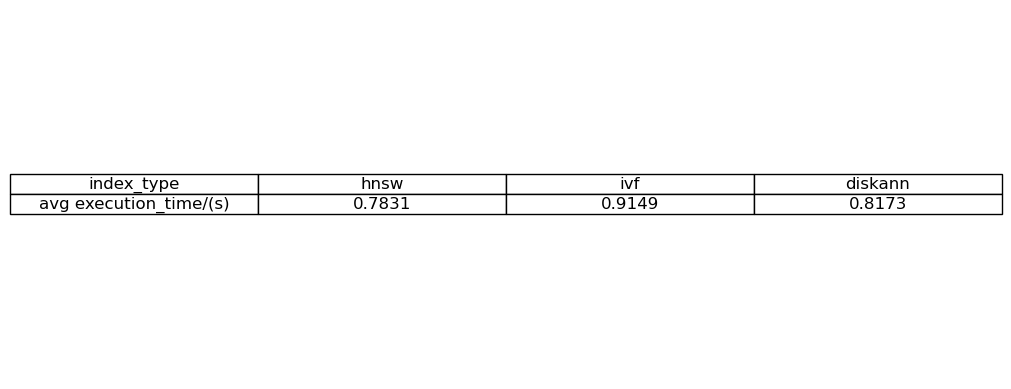

In [116]:
import matplotlib.pyplot as plt

# data for explicit
data = [
    ["index_type", "hnsw", "ivf", "diskann"],
    ["avg execution_time/(s)", f"{avg_hnsw_execution:.4f}", f"{avg_ivf_execution:.4f}", f"{avg_diskann_execution:.4f}"]
]

fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=data, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 1.2)  

plt.show()



In [66]:
# list all the indexes

indexes = collection.list_indexes()

for index in indexes:
    print(index)

SON([('v', 2), ('key', SON([('_id', 1)])), ('name', '_id_')])
